
## **ResShift: Efficient Diffusion Model for Image Super-resolution by Residual Shifting**

[Zongsheng Yue](https://zsyoaoa.github.io/), [Jianyi Wang](https://iceclear.github.io/), and [Chen Change Loy](https://www.mmlab-ntu.com/person/ccloy/)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2307.12348) [![GitHub Stars](https://img.shields.io/github/stars/zsyOAOA/ResShift?affiliations=OWNER&color=green&style=social)](https://github.com/zsyOAOA/ResShift) ![visitors](https://visitor-badge.laobi.icu/badge?page_id=zsyOAOA/ResShift)



## **Clone Repository**

In [2]:
# Clone Repository
import os
CODE_DIR = "ResShift"
import shutil
from pathlib import Path
if Path(CODE_DIR).exists():
  shutil.rmtree(CODE_DIR)

!git clone https://github.com/zsyOAOA/ResShift.git $CODE_DIR
os.chdir(f"./{CODE_DIR}")
print("Done...")

Cloning into 'ResShift'...
remote: Enumerating objects: 904, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 904 (delta 101), reused 92 (delta 92), pack-reused 791 (from 4)
Receiving objects: 100% (904/904), 72.41 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (222/222), done.
Updating files: 100% (577/577), done.
Done...


In [3]:
"""
Managing environments Anaconda:
https://docs.conda.io/projects/conda/en/4.6.0/user-guide/tasks/manage-environments.html
"""
# Viewing the list of your environments
!conda info --envs
# Updating the environment, this step takes about 20 mins, please be patient.
# conda env update -n base -f /content/ResShift/environment.yml
!pip install -r requirements.txt
print("The environemnt has beed updated...")

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 291.3 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versio

## **Inference**

In [13]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2, img3):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 3, 1)
  plt.title('Low Resolution', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 3, 2)
  plt.title('Diffusion Output', fontsize=16)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, 3, 3)
  plt.title('Ground Truth', fontsize=16)
  ax3.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
  ax3.imshow(img3)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

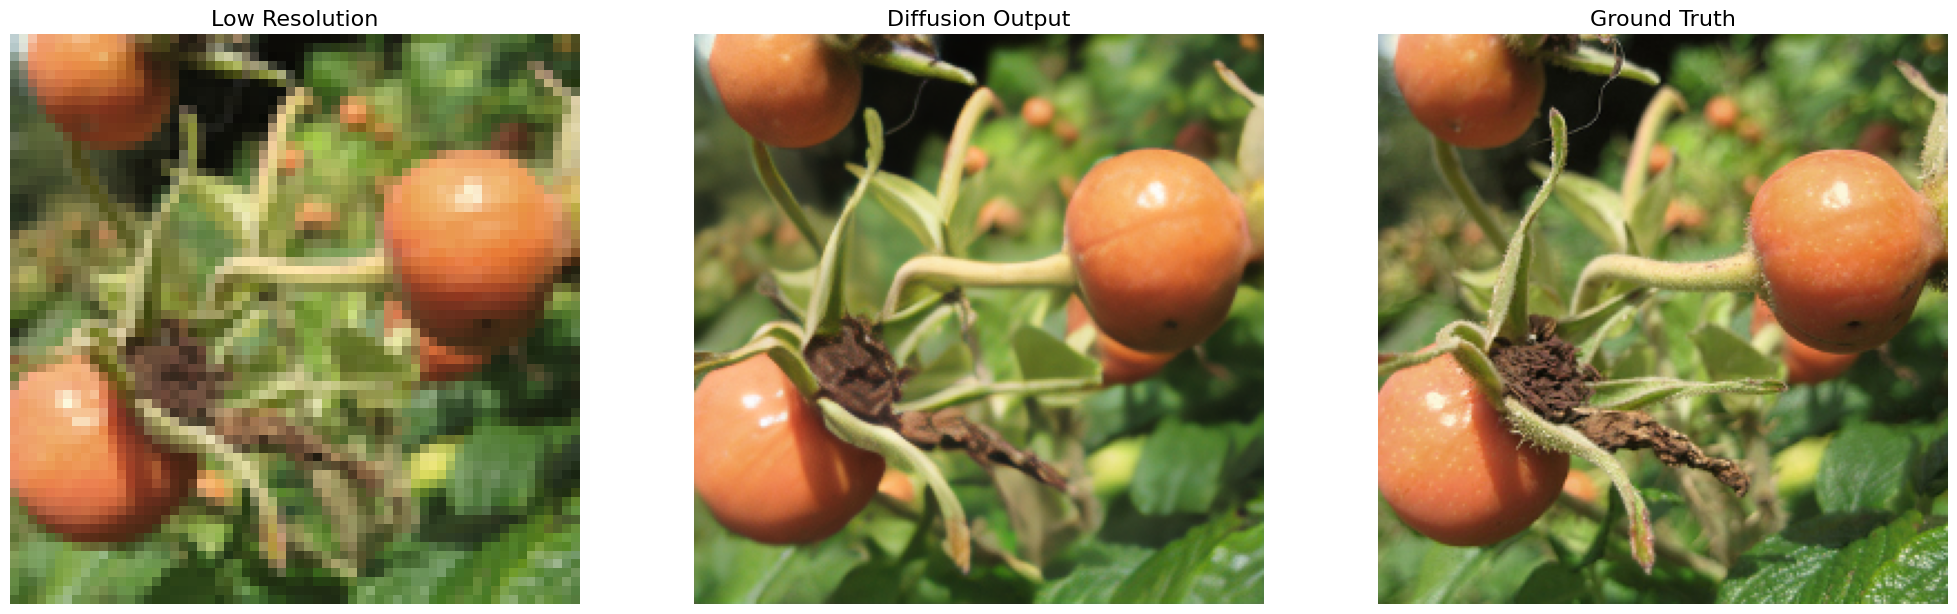

In [ ]:
#  Real-World Image super-resolution
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task realsr
  --scale 4
  --version 3
  --chop_size 512 (GPU memory requirements: 512 --> 20GB, 256 --> 11GB )
"""
!python inference_resshift.py -i test/input/bitki_lq.png -o test/output --task realsr --scale 4 --version v3

im_lq = imread("test/input/bitki_lq.png")
im_hq = imread("test/output/bitki_lq.png")
im_gt = imread("test/input/bitki_gt.png")
display(im_lq, im_hq, im_gt)


In [ ]:
#  Bicubic (resize from matlab) Image super-resolution
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task bicsr
  --scale 4
  --chop_size 256 (GPU memory requirements: 512 --> 20GB, 256 --> 11GB )
"""
!python inference_resshift.py -i testdata/Bicubicx4/lq_matlab/ILSVRC2012_val_00000067.png  -o results/Bicubicx4/ --task bicsr --chop_size 256 --scale 4

im_lq = imread("testdata/Bicubicx4/lq_matlab/ILSVRC2012_val_00000067.png")
im_hq = imread("results/Bicubicx4/ILSVRC2012_val_00000067.png")
display(im_lq, im_hq)

✅ Padded Mask saved at: test/input/cicek_lq_mask.jpg
Chopping size/stride: 2048/1792
Building the diffusion model with length: 4...
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading Diffusion model from weights/resshift_inpaint_imagenet_s4.pth...
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
building MemoryEfficientAttnBlock with 512 in_channels...
Loading AutoEncoder model from we

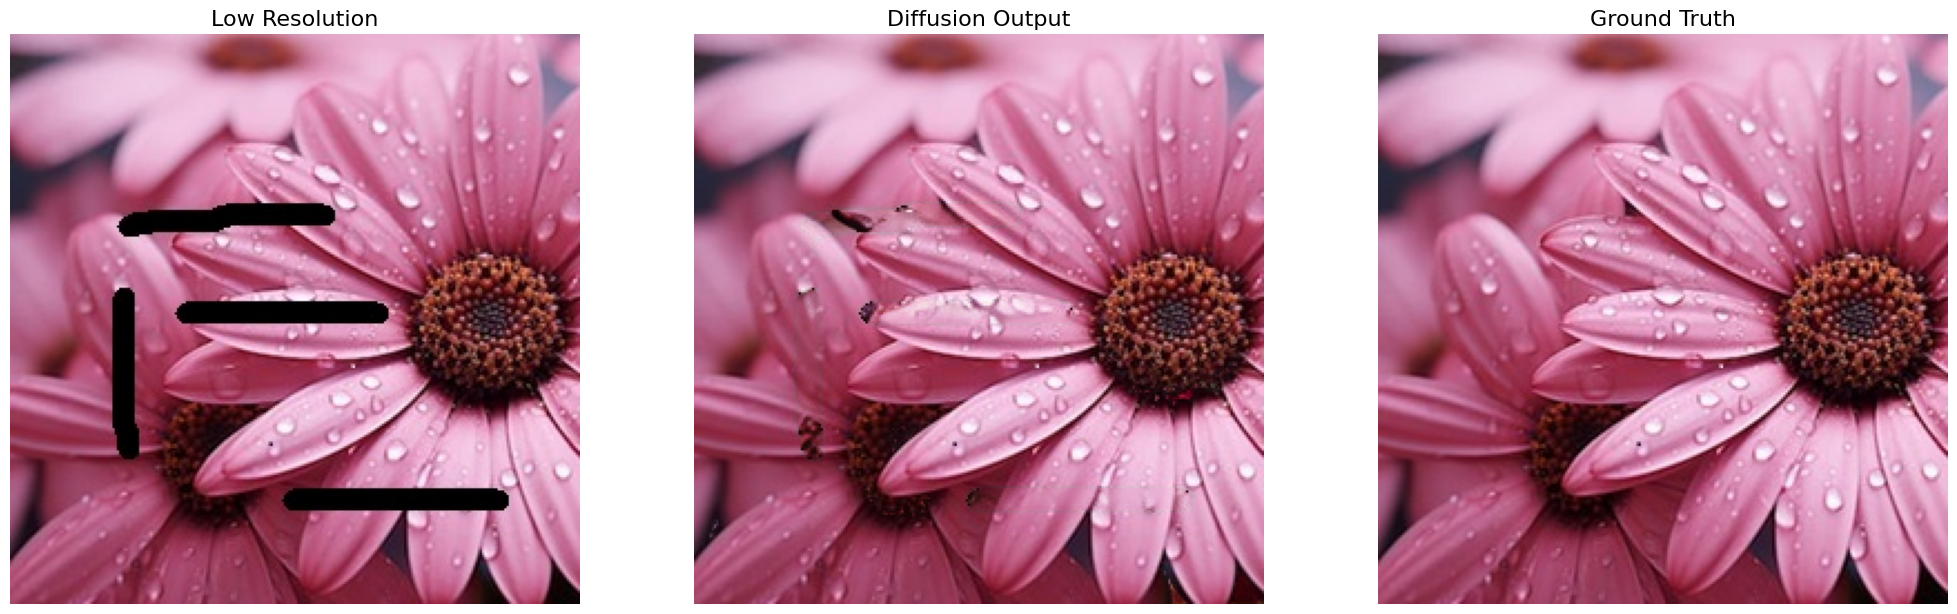

In [44]:
#  Natural Image inpainting
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task inpaint_imagenet
  --scale 1
"""
!python mask_creator.py -i test/input/cicek_lq.jpg
!python inference_resshift.py -i test/input/cicek_lq.jpg --mask_path test/input/cicek_lq_mask.jpg  -o test/output --task inpaint_imagenet --scale 1

im_lq = imread("test/input/cicek_lq.jpg")
im_hq = imread("test/output/cicek_lq.png")
im_gt = imread("test/input/cicek_gt.jpg")
display(im_lq, im_hq, im_gt)

Chopping size/stride: 2048/1792
Building the diffusion model with length: 4...
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading Diffusion model from weights/resshift_inpaint_imagenet_s4.pth...
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
building MemoryEfficientAttnBlock with 512 in_channels...
Loading AutoEncoder model from weights/autoencoder_vq_f4.pth...
Processing done, enjoy

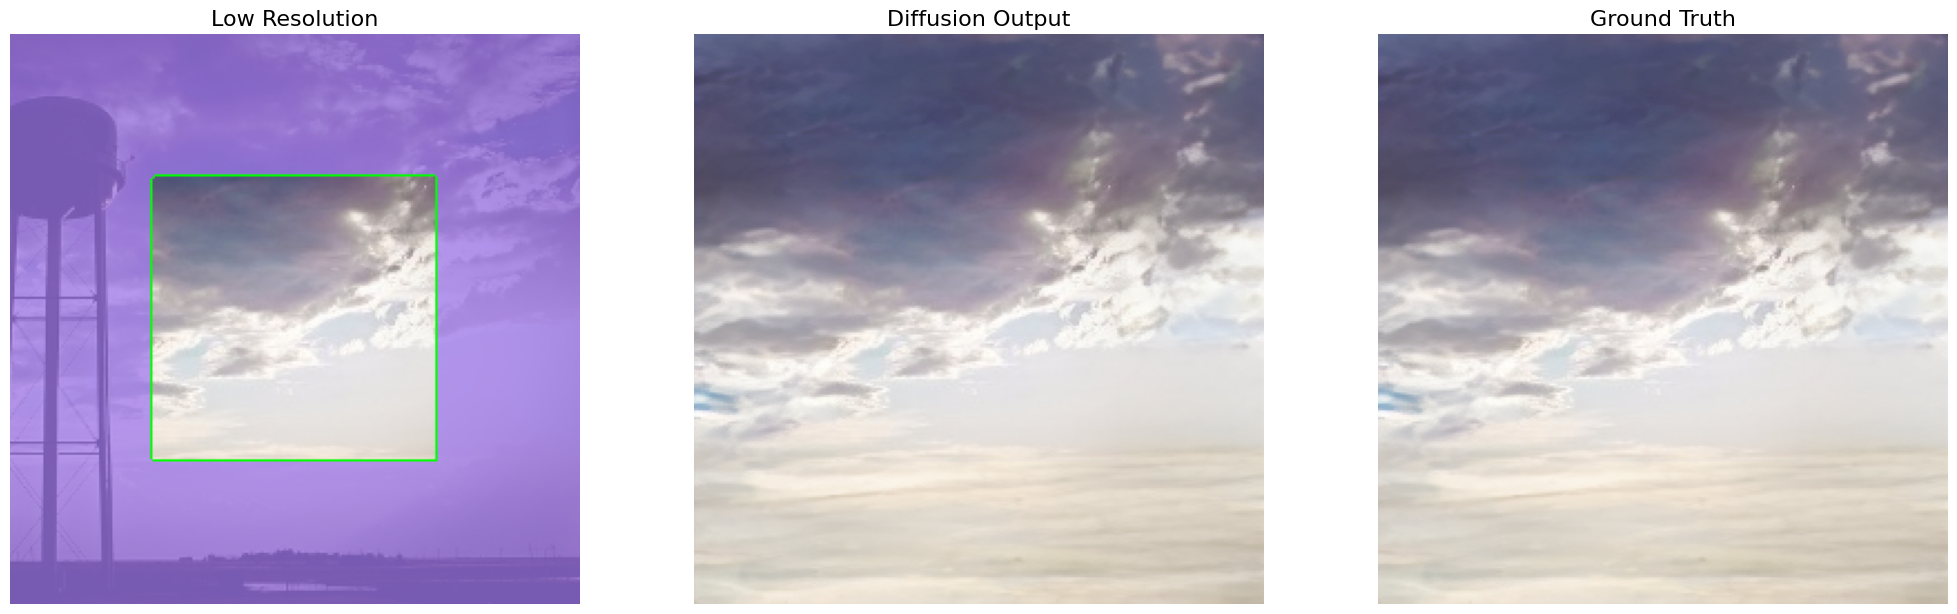

In [37]:
#  Natural Image inpainting
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task inpaint_imagenet
  --scale 1
"""
!python inference_resshift.py -i testdata/inpainting/imagenet/lq/ILSVRC2012_val_00005814.JPEG --mask_path testdata/inpainting/imagenet/mask/ILSVRC2012_val_00005814.JPEG  -o results/inpaint_imagenet --task inpaint_imagenet --scale 1

im_lq = imread("testdata/inpainting/imagenet/lq_mark/ILSVRC2012_val_00005814_mark.png")
im_hq = imread("results/inpaint_imagenet/ILSVRC2012_val_00005814.png")
display(im_lq, im_hq, im_hq)

In [ ]:
#  Face Image inpainting
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task inpaint_face
  --scale 1
"""
!python inference_resshift.py -i testdata/inpainting/face/lq/269.png --mask_path testdata/inpainting/face/mask/269.png  -o results/inpaint_face --task inpaint_face --scale 1

im_lq = imread("testdata/inpainting/face/lq_mark/269_mark.png")
im_hq = imread("results/inpaint_face/269.png")
display(im_lq, im_hq)

In [ ]:
#  Blind Face Restoration
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task faceir
  --scale 1
"""
!python inference_resshift.py -i testdata/faceir/cropped_faces/lq/0444.png  -o results/faceir --task faceir --scale 1

im_lq = imread("testdata/faceir/cropped_faces/lq/0444.png")
im_hq = imread("results/faceir/0444.png")
display(im_lq, im_hq)